# A5

In [2]:
# Standard Imports
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

import Network as NN
import importlib
import mnist_loader

import copy
import random

# Q1: Electrophysiology Experiment

In [3]:
import lif

def MonkeyFixationSpikes(x, T, pop):
    """
    spike_times = MonkeyFixationSpikes(x, T, pop)

    Given the gaze direction, outputs the spiking activity of the monkey's
    neurons.

    Input:
      x is the monkey's gaze direction
      T is the duration of the fixation (in seconds)
      pop is a 6xN matrix of LIF parameters

    Output:
      spike_times is an list containing N arrays of time-stamps indicating
        when each neuron fired.  
    """
    dt = 0.001  # time-step size for simulations
    xts = x*np.ones(int(T/dt))
    sp, v = lif.Stim2Spikes(xts, dt, pop, interp=True)
    return sp

In [4]:
#=====================
# CHOOSE A MONKEY
# The monkey's are numbered 0, 1, 2, 3, and 4.
# This will read in the LIF parameters for the monkey's neurons
# as well as the spiking trains for the unknown sequence.
#=====================
infile = open('monkey3.npz', 'rb')
varsin = np.load(infile)
pop = varsin['pop']   # parameters for population of neurons
Asp = varsin['Asp']   # spike trains for unknown sequence
N = len(pop[1])  # number of neurons

## (a) Behavioural Sampling Experiment

In [5]:
# Select a spread of stimulus values from 0 to 9. Choose at least 100 samples.

# ***** YOUR CODE HERE *****

X = np.random.randint(0,10,[100,1])
A = np.zeros((100,N))
for idx in range(100):
    sp = MonkeyFixationSpikes(X[idx],0.4,pop)
    for i,s in enumerate(sp):
        A[idx,i] = len(s) * 2.5




## (b) View Tuning Curves

40


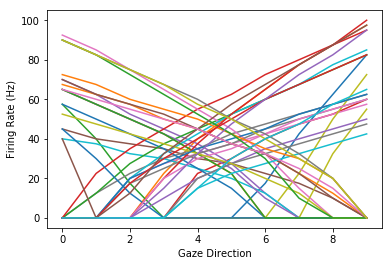

In [6]:
# ***** YOUR CODE HERE *****
print (N)
plt.clf()
for i in range(N):
    l = [0] * 10
   
    for idx,ii in enumerate(A[:,i]):
        l[X[idx,0]] = ii
    plt.plot(range(10),l)
plt.xlabel("Gaze Direction")
plt.ylabel("Firing Rate (Hz)")
plt.show()

## (c) Compute the Decoding Weights

In [7]:
# ***** YOUR CODE HERE *****
# beta = (A.T * A)\-1 * A.T * y

p1 = np.dot(A.T,A)
p1_inv = np.linalg.inv(np.matrix(p1))
p2 = np.dot(p1_inv, A.T)
coef = np.dot(p2, X)
print (np.dot(A,coef))
print (X)

[[ 159.43343818]
 [ 159.43343818]
 [  56.21983498]
 [ 255.40014148]
 [ 104.10796404]
 [ 203.46885264]
 [ -57.03557193]
 [  56.21983498]
 [ 255.40014148]
 [-207.89147288]
 [  56.21983498]
 [  56.21983498]
 [ 159.43343818]
 [-207.89147288]
 [ 117.1077472 ]
 [-207.89147288]
 [ 255.40014148]
 [ 104.10796404]
 [  56.21983498]
 [ 255.40014148]
 [-120.44498622]
 [ 203.46885264]
 [ 255.40014148]
 [ 117.1077472 ]
 [ 159.43343818]
 [ 104.10796404]
 [-120.44498622]
 [ 203.46885264]
 [-140.63043922]
 [ 255.40014148]
 [-207.89147288]
 [  56.21983498]
 [ 117.1077472 ]
 [ 159.43343818]
 [  56.21983498]
 [-207.89147288]
 [ -57.03557193]
 [ 159.43343818]
 [ -57.03557193]
 [-140.63043922]
 [ 159.43343818]
 [ 255.40014148]
 [ -57.03557193]
 [  56.21983498]
 [  56.21983498]
 [ 104.10796404]
 [ 203.46885264]
 [-140.63043922]
 [  56.21983498]
 [-140.63043922]
 [-140.63043922]
 [  56.21983498]
 [ 117.1077472 ]
 [ 104.10796404]
 [ 255.40014148]
 [ 203.46885264]
 [ 255.40014148]
 [-207.89147288]
 [ 104.1079640

## (d) View Spike Raster of Unknown Sequence

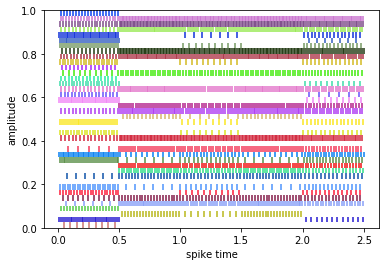

In [8]:
# ***** YOUR CODE HERE *****
import lif
plt.clf()
plt.xlabel("spike time")
plt.ylabel("amplitude")
lif.PlotSpikeRaster(Asp)

## (e) Decode the Unknown Code

In [9]:
# Spike trains for unknown sequence are stored in 'Asp'
# Asp is a list of arrays of spike trains, one array per neuron.

In [10]:
# Compute firing rates
# ***** YOUR CODE HERE *****
spikes1 = lif.CountSpikes(Asp, 0,0.5)
spikes2 = lif.CountSpikes(Asp, 0,1)
spikes3 = lif.CountSpikes(Asp, 1,1.5)
spikes4 = lif.CountSpikes(Asp, 1.5,2)
spikes5 = lif.CountSpikes(Asp, 2,2.5)



In [11]:
# Decode unknown code

# ***** YOUR CODE HERE *****

## (f) Display the Unknown Code

In [12]:
# ***** YOUR CODE HERE *****

# Q2: LSTM

In [13]:
# You may include some Python code to help you.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    s1 = np.exp(x) - np.exp(-x)
    s2 = np.exp(x) + np.exp(-x)
    s = s1 / s2
    return s

def cal_gates(W,v,b):
    return sigmoid(np.dot(W,v) + b)

def Ct_ht(W,b, Wc,v,bc,Ct_minus):
    gates = cal_gates(W,v,b)
    ft = gates[0]
    it = gates[1]
    ot = gates[2]
    Ct = ft * Ct_minus + tanh(np.dot(Wc,v) + bc) * it
    ht = ot * tanh(Ct)
    return ft, it, ot, Ct[0], ht[0]

## (a)

### (i)

In [14]:
# You can include some code, if you want.
W = np.array([[0,8,0,0],[0,0,9,0],[0,0,0,10]])
bc = np.array([0])
b = np.array([-4,-4.5,-5])
Wc = np.array([1,0,0,0])
v =np.array([0.05,1,0,0])
Ct_minus = np.array([-0.02])
ft,it,ot,ct,ht = Ct_ht(W,b,Wc,v,bc,Ct_minus)
print ("ft {}, it {}, ot {}, Ct {}, ht {}".format(ft,it,ot,ct,ht))
print ("Ct is quite similar to Ct_minus because forget_gate chooses to remember most of the cell while input gate and output gate is not active")

ft 0.9820137900379085, it 0.01098694263059318, ot 0.0066928509242848554, Ct -0.019091386001178278, ht -0.00012776027875546946
Ct is quite similar to Ct_minus because forget_gate chooses to remember most of the cell while input gate and output gate is not active


YOUR ANSWER HERE.

### (ii)

In [15]:
v =np.array([0.05,0,1,0])
ft,it,ot,ct,ht = Ct_ht(W,b,Wc,v,bc,Ct_minus)
print ("ft {}, it {}, ot {}, Ct {}, ht {}".format(ft,it,ot,ct,ht))
print ("Ct is almost equal to  ht_minus because input gate is almost equal to 1")

ft 0.01798620996209156, it 0.9890130573694068, ot 0.0066928509242848554, Ct 0.04904976095905828, ht 0.00032801972156155007
Ct is almost equal to  ht_minus because input gate is almost equal to 1


YOUR ANSWER HERE.

### (iii)

In [16]:
v =np.array([0.05,1,0,1])
ft,it,ot,ct,ht = Ct_ht(W,b,Wc,v,bc,Ct_minus)
print ("ft {}, it {}, ot {}, Ct {}, ht {}".format(ft,it,ot,ct,ht))
print ("Ct is almost equal to Ct_minus because of its forget_gate approaching 1.0")
print ("ht is almost equal to Ct_minus as well because the output gate is nearly 1.0 as well")

ft 0.9820137900379085, it 0.01098694263059318, ot 0.9933071490757153, Ct -0.019091386001178278, ht -0.018961306577925028
Ct is almost equal to Ct_minus because of its forget_gate approaching 1.0
ht is almost equal to Ct_minus as well because the output gate is nearly 1.0 as well


YOUR ANSWER HERE.

## (b)

In [17]:
print ("let xt = [1,1,1]")
v =np.array([0.05,1,1,1])
ft,it,ot,ct,ht = Ct_ht(W,b,Wc,v,bc,Ct_minus)
print ("ft {}, it {}, ot {}, Ct {}, ht {}".format(ft,it,ot,ct,ht))

let xt = [1,1,1]
ft 0.9820137900379085, it 0.9890130573694068, ot 0.9933071490757153, Ct 0.029769209357541942, ht 0.029561236546369364


YOUR ANSWER HERE.

## (c)

In [18]:
print ("let xt = [1/2,1/2,1/2]")
v =np.array([0.05,1/2,1/2,1/2])
ft,it,ot,ct,ht = Ct_ht(W,b,Wc,v,bc,Ct_minus)
print ("ft {}, it {}, ot {}, Ct {}, ht {}".format(ft,it,ot,ct,ht))

let xt = [1/2,1/2,1/2]
ft 0.5, it 0.5, ot 0.5, Ct 0.014979187478940002, ht 0.007489033627901628


YOUR ANSWER HERE.

# Q3: Adversarial Inputs

## Load data, get trained network, etc.

In [19]:
# Load MNIST
train, validate, test = mnist_loader.load_data_wrapper()
train_in = np.array(train[0])
train_out = np.array(train[1])

In [20]:
# Or, you can load the pretrained Network object from the supplied file,
# like this...
net = NN.Network()
net.Load('MNIST_trained_784-100-100-10.npy')

In [21]:
test_ac = NN.ClassificationAccuracy(net.FeedForward(test[0]), test[1])
print('Testing Accuracy = '+str(test_ac*100)+'%')

train_ac = NN.ClassificationAccuracy(net.FeedForward(train[0]), train[1])
print('Training Accuracy = '+str(train_ac*100)+'%')

Testing Accuracy = 97.53%
Training Accuracy = 99.136%


In [22]:
#Extract 10 digits from MNIST classified correctly by the network
x_image = []
x_class = []
for i in range(0, 10):
    while True:
        j = random.randint(0, len(test[0]))
        if np.argmax(test[1][j]) == i:
            r = net.FeedForward([test[0][j]])
            if np.argmax(r) == i:
                x_image.append(test[0][j])
                x_class.append(test[1][j])
                break

In [23]:
print (net.W[0].shape)

(784, 100)


## (a) GradientInput

In [24]:
def GradientInput(net, x, t):
    '''
        dEdx = Input_Gradient_Ascent(net, x, t)

        Computes dEdx for a network given input x and target t.
        The cost function is specified by the network.

        Inputs:
          net is the neural network
          x is the input that you want to perturb
          t is the corresponding true target vector (one-hot)
        
        Output:
          dEdx is a vector the same shape as x
    '''

    # ***** YOUR CODE HERE *****
    
    dEdx = copy.deepcopy(x)
    t = np.array(t)  # convert t to an array, in case it's not
    
    # Error gradient for top layer
    dEdz = net.TopGradient(t)

    # Loop down through the layers
    for i in range(net.n_layers - 2, 0, -1):
        pre = net.lyr[i]
        # If not the bottom layer,
        # Project error gradient down to layer below
        dEdz = (dEdz @ net.W[i].T) * pre.sigma_z_p(pre.z)
    dEdx = dEdz @ net.W[0].T

    return dEdx

In [25]:
GradientInput(net,x_image,x_class)

array([[-8.79537862e-03,  1.01423169e-02,  2.95691724e-02, ...,
         4.65421787e-02, -2.15323348e-02, -2.86257332e-02],
       [-3.48591062e-02,  2.12010300e-02,  1.03243403e-02, ...,
         6.42041250e-03, -3.46991647e-02, -1.34013074e-02],
       [-6.80271321e-03, -2.21486815e-03,  1.70879475e-02, ...,
         2.25789514e-02, -3.58799749e-02, -4.85009507e-02],
       ...,
       [-9.07616586e-03, -8.00704849e-03,  4.40090773e-02, ...,
         9.21964353e-03, -4.73003887e-03,  4.14669628e-02],
       [ 8.87346749e-03, -1.56549585e-03,  9.53937090e-03, ...,
         4.72335399e-02, -2.94035972e-02, -6.71757058e-02],
       [-2.62090709e-06,  4.62213677e-07, -5.99913583e-06, ...,
        -4.75719069e-05,  2.05070214e-05,  3.18197244e-05]])

## (b) FGSM

In [26]:
def FGSM(net, x_input, x_class, ep=0.05, it_lim=100000, conf=0.5, targ=False):
    '''
        x_adv = FGSM(net, x_input, x_class, ep=0.05, it_lim=100000, conf=0.5)
        
        Performs the Fast Gradient Sign Method, perturbing each input until it
        is misclassified with the specified confidence, or reaches the maximum
        number of iterations.
        
        Inputs:
          net is the Network object
          x_input is a batch of inputs
          x_class is the corresponding one-hot class vectors
          ep is the perturbation step for the FGSM
          it_lim is the maximum number of iterations
          conf is the desired confidence for the misclassification
          targ is Boolean, indicating if the FGSM is targetted
             if targ is False, then x_class is considered to be the true
             class of the input, and FGSM will work to increase the cost
             if targ is True, then x_class is considered to be the target
             class for the perturbation, and FGSM will work to decrease the cost
        
        Output:
          x_adv is a batch of adversarial inputs, the same size as x_input
    '''

    # ***** YOUR CODE HERE *****            
    
    x_adv = copy.deepcopy(x_input)
    
    loop = 0
    conf_reach = False
    if targ==False:
        while loop < it_lim and conf_reach == False:
            pred_class = net.FeedForward(x_adv)
            grad = GradientInput(net, x_adv, x_class)
            x_adv += ep * np.sign(grad)
            if loop % 1 == 0:
                print ("-----------------------------------------")
                conf_reach = True
                for x_cls, p_cls in zip(x_class, pred_class):
                    gt_label = np.argmax(x_cls)
                    pd_label = np.argmax(p_cls)
                    if pd_label == gt_label:
                        conf_reach = False
                    if pd_label != gt_label and p_cls[pd_label] < conf:
                        conf_reach = False
                    print ("digit {} classified as {} with classification value {}".format(gt_label, pd_label, p_cls[pd_label]))
            loop += 1
    
    if targ==True:
        gt_class = net.FeedForward(x_adv)
        gt_class = np.argmax(gt_class,axis=1)
        print (gt_class)
        while loop < it_lim and conf_reach == False:
            pred_class = net.FeedForward(x_adv)
            grad = GradientInput(net, x_adv, x_class)
            x_adv -= ep * np.sign(grad)
            if loop % 1 == 0:
                print ("-----------------------------------------")
                conf_reach = True
                for gt_label, p_cls, want_cls in zip(gt_class, pred_class, want_class):
                    want_label = np.argmax(want_cls)
                    pd_label = np.argmax(p_cls)
                    if pd_label != want_label:
                        conf_reach = False
                    if pd_label == want_label and p_cls[pd_label] < conf:
                        conf_reach = False
                    print ("perturbed {} classified as {} with classification value {}".format(gt_label, pd_label, p_cls[pd_label]))
            loop += 1
    
    
    return np.array(x_adv)

## (c) Untargetted Adversarial Perturbation

-----------------------------------------
digit 0 classified as 0 with classification value 0.999801044533704
digit 1 classified as 1 with classification value 0.9923396351711655
digit 2 classified as 2 with classification value 0.4304461906571169
digit 3 classified as 3 with classification value 0.9997618209625153
digit 4 classified as 4 with classification value 0.9994308580081888
digit 5 classified as 5 with classification value 0.9826257151909048
digit 6 classified as 6 with classification value 0.9997289852701061
digit 7 classified as 7 with classification value 0.987213508234254
digit 8 classified as 8 with classification value 0.9999298408235279
digit 9 classified as 9 with classification value 0.9991213885801357
-----------------------------------------
digit 0 classified as 0 with classification value 0.9997709972531981
digit 1 classified as 1 with classification value 0.9896342730248113
digit 2 classified as 4 with classification value 0.4480690426298672
digit 3 classified as

-----------------------------------------
digit 0 classified as 0 with classification value 0.8855411669747552
digit 1 classified as 7 with classification value 0.9994610587015335
digit 2 classified as 4 with classification value 0.9836611490626042
digit 3 classified as 5 with classification value 0.6796215221152124
digit 4 classified as 9 with classification value 0.8103539092598434
digit 5 classified as 2 with classification value 0.9941810495175329
digit 6 classified as 6 with classification value 0.8950106782150296
digit 7 classified as 9 with classification value 0.9972075848155503
digit 8 classified as 8 with classification value 0.5336119181314799
digit 9 classified as 8 with classification value 0.9920982407708415
-----------------------------------------
digit 0 classified as 0 with classification value 0.870288538885878
digit 1 classified as 7 with classification value 0.9995261584600426
digit 2 classified as 4 with classification value 0.9855785193791229
digit 3 classified a

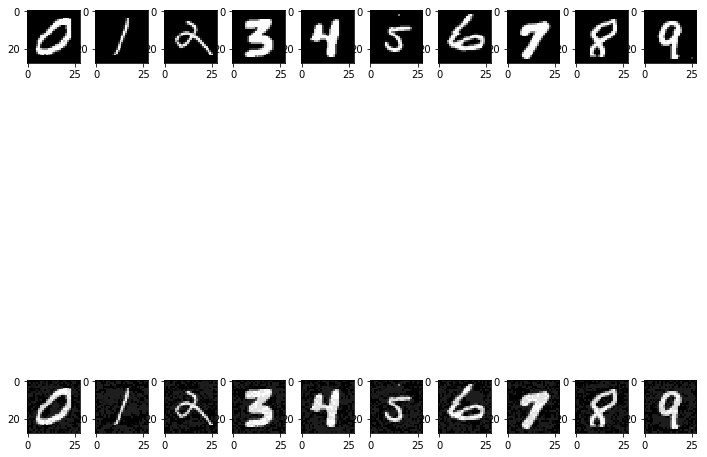

In [27]:
# ***** YOUR CODE HERE *****
x_adjust = FGSM(net, x_image,x_class,ep=0.001)
fig = plt.figure(figsize=(12, 13))
plt.subplots_adjust(hspace=0.1,wspace=0.3)
for idx in range(10):
    im = np.array(x_image[idx])
    im = im.reshape(28,28)
    plotwindow = fig.add_subplot(2,10,idx + 1)
    plt.imshow(im , cmap='gray')
    plotwindow = fig.add_subplot(2,10,10 + idx + 1)
    im_adjust = np.array(x_adjust[idx])
    im_adjust = im_adjust.reshape(28,28)
    plt.imshow(im_adjust, cmap='gray')


## (d) Targetted Adversarial Perturbation

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[5 1 7]
-----------------------------------------
perturbed 5 classified as 5 with classification value 0.9826257151909049
perturbed 1 classified as 1 with classification value 0.9923396351711655
perturbed 7 classified as 7 with classification value 0.9872135082342539
-----------------------------------------
perturbed 5 classified as 5 with classification value 0.7808805632057523
perturbed 1 classified as 1 with classification value 0.9597868440118202
perturbed 7 classified as 7 with classification value 0.9292061417455802
-----------------------------------------
perturbed 5 classified as 3 with classification value 0.7730087499408356
perturbed 1 classified as 1 with classification value 0.7638999206982766
perturbed 7 classified as 7 with classification value 0.5663668040663717
-----------------------------------------
perturbed 5 classified as 3 with classification value 0.97271054960

<Figure size 432x288 with 0 Axes>

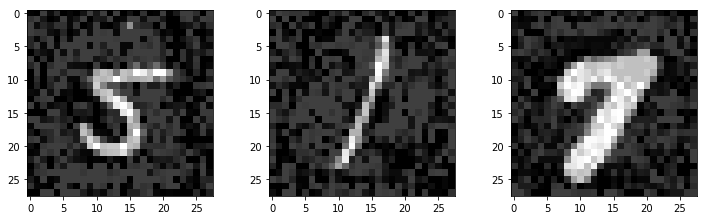

In [28]:
# ***** YOUR CODE HERE *****
want_class = np.zeros([3,10])
want_class[0,3] = 1
want_class[1,0] = 1
want_class[2,6] = 1
print (want_class)
input_image = np.zeros([3,784])
input_image[0] = x_image[5]
input_image[1] = x_image[1]
input_image[2] = x_image[7]
x_adjust = FGSM(net, input_image,want_class,ep=0.01, conf=0.8, targ=True)
plt.clf()
fig = plt.figure(figsize=(12, 13))
plt.subplots_adjust(hspace=0.1,wspace=0.3)
for idx in range(3):
    im = np.array(x_adjust[idx])
    im = im.reshape(28,28)
    plotwindow = fig.add_subplot(1,3,idx + 1)
    plt.imshow(im , cmap='gray')